In [3]:
import MetaTrader5 as mt5
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import datetime, timezone

print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)



MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.45


In [4]:
if not mt5.initialize():
    print('Initialization failed, check internet connection. You must have Meta Trader 5 installed.')
    mt5.shutdown()

else:
    print(mt5.account_info()._asdict())
    print("\n")
    print(mt5.terminal_info()._asdict())
    print("\n")
    print(mt5.symbols_total())
    
    
# you code here

{'login': 75525372, 'trade_mode': 0, 'leverage': 100, 'limit_orders': 200, 'margin_so_mode': 0, 'trade_allowed': True, 'trade_expert': True, 'margin_mode': 2, 'currency_digits': 2, 'fifo_close': False, 'balance': 68.64, 'credit': 0.0, 'profit': -1.87, 'equity': 66.77, 'margin': 16.58, 'margin_free': 50.19, 'margin_level': 402.71411338962605, 'margin_so_call': 50.0, 'margin_so_so': 30.0, 'margin_initial': 0.0, 'margin_maintenance': 0.0, 'assets': 0.0, 'liabilities': 0.0, 'commission_blocked': 0.0, 'name': 'mike bright', 'server': 'MetaQuotes-Demo', 'currency': 'USD', 'company': 'MetaQuotes Software Corp.'}


{'community_account': True, 'community_connection': False, 'connected': True, 'dlls_allowed': False, 'trade_allowed': True, 'tradeapi_disabled': False, 'email_enabled': False, 'ftp_enabled': False, 'notifications_enabled': False, 'mqid': False, 'build': 4075, 'maxbars': 100000, 'codepage': 0, 'ping_last': 166535, 'community_balance': 0.0, 'retransmission': 0.0, 'company': 'MetaQuote

In [5]:
account = mt5.account_info()
terminal = mt5.terminal_info()

print(account.equity)

if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is successfully functional")
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")
    mt5.shutdown()

66.77
AI is successfully functional


In [17]:
#rates = mt5.copy_rates_from_pos("GBPUSD", mt5.TIMEFRAME_H1, 0, 99999)  
target_market = ["GBPUSD","USDCAD","AUDUSD","USDCHF","NZDUSD","EURUSD","XAUUSD"]

In [25]:
n = 6

In [26]:
model = joblib.load(target_market[n]+" regressor.joblib")
sc_x = joblib.load(target_market[n]+" sc_x.joblib")
sc_y = joblib.load(target_market[n]+" sc_y.joblib")

In [27]:
#dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])]
rates = mt5.copy_rates_from_pos(target_market[n], mt5.TIMEFRAME_H1, 0, 500)
print(rates[0][0])
print(rates.shape)
data = []
close_price = []
open_price = []

for i in range(len(rates)):
    data.append([rates[i][1],rates[i][5]])
    open_price.append(rates[i][1])
    close_price.append(rates[i][4])
data = np.array(data)
close_price = np.array(close_price)
print(data)
print(close_price[-1:])

1698256800
(500,)
[[ 1977.11 22603.  ]
 [ 1981.25  9328.  ]
 [ 1978.19 12335.  ]
 [ 1983.21  4248.  ]
 [ 1981.5   3150.  ]
 [ 1980.82  2263.  ]
 [ 1980.68  2779.  ]
 [ 1982.03  3199.  ]
 [ 1982.97  3815.  ]
 [ 1983.5   5858.  ]
 [ 1984.93  2995.  ]
 [ 1984.73  3013.  ]
 [ 1987.22  2255.  ]
 [ 1988.46  4743.  ]
 [ 1985.75  6775.  ]
 [ 1985.    9687.  ]
 [ 1990.15  6601.  ]
 [ 1992.17  5292.  ]
 [ 1990.62  5144.  ]
 [ 1986.68  6250.  ]
 [ 1984.64 24739.  ]
 [ 1979.45 25302.  ]
 [ 1978.97 21861.  ]
 [ 1979.55 13786.  ]
 [ 1980.15 11419.  ]
 [ 1984.24 12418.  ]
 [ 1986.97  5291.  ]
 [ 1986.    5058.  ]
 [ 1984.38  1839.  ]
 [ 1983.77   745.  ]
 [ 1985.25  2307.  ]
 [ 1984.32  3109.  ]
 [ 1983.5   5621.  ]
 [ 1985.58  4215.  ]
 [ 1986.66  2098.  ]
 [ 1987.89  2330.  ]
 [ 1989.52  4513.  ]
 [ 1988.97  6674.  ]
 [ 1987.49  7010.  ]
 [ 1987.37  4682.  ]
 [ 1986.92  4701.  ]
 [ 1985.82  4768.  ]
 [ 1980.59  6221.  ]
 [ 1981.82 18195.  ]
 [ 1980.42 22344.  ]
 [ 1983.01 19459.  ]
 [ 1982.1  11931

In [28]:
data = sc_x.transform(data)
y_pred = model.predict(data)
print(y_pred)

[1.7302648  1.73506525 1.74109222 1.74053854 1.73976629 1.73492496
 1.73982689 1.74273109 1.74502549 1.74975804 1.7504103  1.75471796
 1.75894359 1.7581546  1.75265793 1.76406643 1.76780348 1.76804011
 1.75749262 1.75370216 1.73806363 1.72188087 1.73233792 1.73412643
 1.74246875 1.74998335 1.7547404  1.75229103 1.74877891 1.75022137
 1.74924682 1.74733981 1.75066815 1.75348134 1.75741284 1.76163071
 1.76242354 1.75688834 1.75685458 1.7558486  1.75330308 1.74471339
 1.74428073 1.74089525 1.74563089 1.74320331 1.73788902 1.74033689
 1.76500469 1.78916576 1.8140786  1.80978385 1.79813153 1.79990508
 1.80466101 1.80590857 1.80260595 1.79918754 1.79783505 1.79235148
 1.78636351 1.77821611 1.77327247 1.78466095 1.77969944 1.78000191
 1.78420669 1.78683592 1.78320895 1.78015735 1.78998637 1.78894682
 1.78671574 1.78362411 1.7822256  1.77980691 1.77899753 1.78061245
 1.78274646 1.78049601 1.7771831  1.77158    1.77286927 1.77584679
 1.77956608 1.7847859  1.78613026 1.79102704 1.79121868 1.7838

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:    0.0s finished


In [29]:
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
print(y_pred)


[1977.7028     1979.4137     1981.56173333 1981.3644     1981.08916667
 1979.3637     1981.11076667 1982.14583333 1982.96356667 1984.65026667
 1984.88273333 1986.418      1987.92403333 1987.64283333 1985.6838
 1989.74983333 1991.08173333 1991.16606667 1987.4069     1986.05596667
 1980.48233333 1974.71473333 1978.44166667 1979.0791     1982.05233333
 1984.73056667 1986.426      1985.55303333 1984.3013     1984.8154
 1984.46806667 1983.7884     1984.97463333 1985.97726667 1987.37846667
 1988.88173333 1989.1643     1987.19153333 1987.1795     1986.82096667
 1985.91373333 1982.85233333 1982.69813333 1981.49153333 1983.17933333
 1982.31413333 1980.4201     1981.29253333 1990.08423333 1998.69533333
 2007.57436667 2006.0437     2001.89076667 2002.52286667 2004.2179
 2004.66253333 2003.48546667 2002.26713333 2001.7851     1999.83073333
 1997.6966     1994.79283333 1993.0309     1997.0898     1995.3215
 1995.4293     1996.9279     1997.86496667 1996.5723     1995.4847
 1998.9878     1998.6173  

In [30]:

score = model.score(
    data[-100:],
    sc_y.transform(close_price[-100:].reshape((len(close_price[-100:]),1))).reshape(-1)
)
print(score)

0.9799727490138535


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:    0.0s finished


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:    0.0s finished


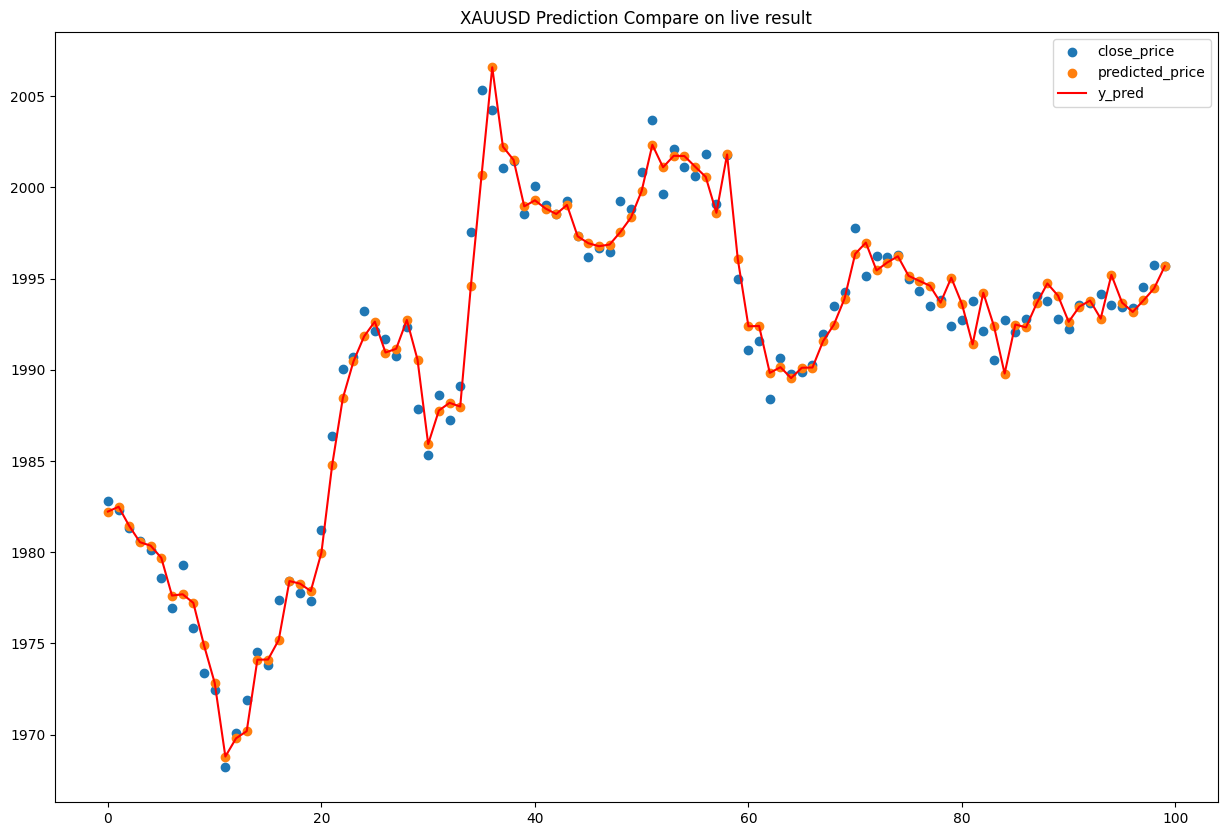

In [31]:
plt.figure(figsize=(15, 10))
plt.title(target_market[n]+" Prediction Compare on live result")
x_point = []
for i in range(len(close_price[-100:])):
  t = [i]
  x_point.append(t)
plt.scatter(x_point, close_price[-100:], label="close_price")
plt.scatter(x_point, y_pred[-100:], label="predicted_price")
#plt.plot(close_price[-100:], label="y_test")

y_pred = model.predict(data[-100:])
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
plt.plot(
    y_pred,
    label="y_pred", color="red"
)



plt.legend()

plt.show()

In [19]:
data = sc_x.inverse_transform(data)


In [20]:
# creating an assumption on the system
print(close_price[-1:])
print(data[-1:,:])
y_pred = model.predict(sc_x.transform(data[-1:,:]))
y_pred = sc_y.inverse_transform(y_pred.reshape((len(y_pred),1)))
y_pred = y_pred.reshape(-1)
print(y_pred)



[1.2532]
[[1.7007588e+09 1.2532300e+00 5.3000000e+02]]


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    0.4s


[1.25341337]


[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:    0.6s finished


In [21]:
# set time zone to UTC
# Convert Unix epoch time to UTC time
utc_time = datetime.fromtimestamp(int(data[-1,0]))


# Extract the hour and minutes from the UTC datetime object
year = utc_time.year
month = utc_time.month
day = utc_time.day
hour = utc_time.hour
minutes = utc_time.minute

# Print the hour and minutes
# Print the results
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", hour)
print("Minutes:", minutes)

Year: 2023
Month: 11
Day: 23
Hour: 18
Minutes: 0


In [51]:
chart1H = mt5.copy_rates_from_pos(target_market[n], mt5.TIMEFRAME_H1, 0, 5)
print(chart1H[-1][0])

1698271200


In [52]:
utc_time1H = datetime.fromtimestamp(int(chart1H[-1][0]))
h = utc_time1H.hour
print(h)

for i in range(1,len(chart1H)):
    utc_time1H = datetime.fromtimestamp(int(chart1H[i * -1][0]))
    h = utc_time1H.hour
    if(hour == h):
        print(h, "The only time to trade")
        break
    print(h)

23
23
22
21 The only time to trade


In [22]:
#trade operation
if(terminal.connected == True and terminal.trade_allowed == True):
    print("AI is functional")
    total_order = mt5.positions_total()
    print(total_order)
    
    
else:
    print("Please make sure metatrade 5 has internet and algo Trade is Turn On")

AI is functional
4


In [10]:
# Get the current datetime in UTC
now_utc = datetime.utcnow()

# Convert the UTC datetime to GMT +0
now_gmt0 = now_utc.astimezone(timezone.utc)

# Get the year, month, day, and hour from the GMT +0 datetime
year = now_gmt0.year
month = now_gmt0.month
day = now_gmt0.day
hour = now_gmt0.hour + 1
mins = now_gmt0.minute
# Print the results
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", hour)
print("Minute:", mins)

Year: 2023
Month: 11
Day: 1
Hour: 7
Minute: 10


: 

In [45]:
lot = 0.01
symbol = "GBPUSD"
price = mt5.symbol_info_tick(symbol).bid
if(y_pred[-1] > price):
    price = mt5.symbol_info_tick(symbol).ask
    #buying a market
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt5.ORDER_TYPE_BUY,
        "price": price,
        "sl": 0.0,
        "tp": 0.0,
        "deviation": 20,
        "magic": 0,
        "comment": "Dbot_ML",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
elif(y_pred[-1] < price):
    price = mt5.symbol_info_tick(symbol).bid
    #buying a market
    request = {
        "action": mt5.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt5.ORDER_TYPE_SELL,
        "price": price,
        "sl": 0.0,
        "tp":0.0,
        "deviation": 20,
        "magic": 0,
        "comment": "Dbot_ML",
        "type_time": mt5.ORDER_TIME_GTC,
        "type_filling": mt5.ORDER_FILLING_RETURN,
    }
result=mt5.order_send(request)
print(result)

OrderSendResult(retcode=10018, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Market closed', request_id=2098276545, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='GBPUSD', volume=0.01, price=1.21471, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=0, type_filling=2, type_time=0, expiration=0, comment='Dbot_ML', position=0, position_by=0))


In [39]:
print(mt5.positions_total())

3


In [42]:
order_symbols = mt5.positions_get()
n = 1
for order_symbol in order_symbols:
    print(order_symbol.symbol)
    if(target_market[n] == order_symbol.symbol):
        print("seen")
        target_order = order_symbol
        break

print(target_order)
o_price = target_order.price_open
c_price = target_order.price_current
profit = target_order.profit
lot_size = target_order.volume
order_type = target_order.type
tp = target_order.tp
sl = target_order.sl

print("open price ", o_price)
print("close_price ",c_price)
print("profit ",profit)
print("lot size ",lot_size)
print("order type ",order_type)

USDCHF
USDCAD
seen
TradePosition(ticket=50764878607, time=1697054762, time_msc=1697054762903, time_update=1697054762, time_update_msc=1697054762903, type=1, magic=0, identifier=50764878607, reason=0, volume=0.01, price_open=1.36079, sl=0.0, tp=0.0, price_current=1.36136, swap=-0.01, profit=-0.42, symbol='USDCAD', comment='', external_id='')
open price  1.36079
close_price  1.36136
profit  -0.42
lot size  0.01
order type  1


In [27]:

#modify the market

request = {
    "action": mt5.TRADE_ACTION_SLTP,
    "symbol": target_order.symbol,
    "sl": 0.0,
    "tp": y_pred[-1],
    "position": target_order.ticket
}

result=mt5.order_send(request)
print(result)

OrderSendResult(retcode=10009, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=111532076, retcode_external=0, request=TradeRequest(action=6, magic=0, order=0, symbol='GBPUSD', volume=0.0, price=0.0, stoplimit=0.0, sl=0.0, tp=1.2213676333333343, deviation=0, type=0, type_filling=0, type_time=0, expiration=0, comment='', position=50758476285, position_by=0))


In [44]:
result = mt5.Close(target_order.symbol,ticket=target_order.ticket)
print(result)

False


In [22]:
print(mt5.last_error())
print(price)

(1, 'Success')
1.2278


: 

In [2]:
import time

for i in range(10):
    print("Hi ", i)
    time.sleep(5)

Hi  0
Hi  1
Hi  2
Hi  3
Hi  4
Hi  5
Hi  6
Hi  7
Hi  8
Hi  9
